In [52]:

import pandas as pd

import numpy as np
import itertools
import category_encoders as ce

from numpy import mean
from numpy import std
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('bank-full.csv', sep=';')

col_names = ['age', 
             'job', 
             'martial', 
             'education', 
             'cred_in_default', 
             'balance',
             'housing',
             'loan',
             'contact',
             'last_contact_day',
             'last_contact_month',
             'last_contact_dur',
             'num_of_contacts_during_campaign',
             'past_days',
             'prev_contacts',
             'prev_outcome',
             'sub_term_deposit']
df.columns = col_names

df.head(50)

,age,job,martial,education,cred_in_default,balance,housing,loan,contact,last_contact_day,last_contact_month,last_contact_dur,num_of_contacts_during_campaign,past_days,prev_contacts,prev_outcome,sub_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
print("Bank data set dimensions (observations, features): {}".format(df.shape))
print("\n\nsummary statistics of the dataset:\n\n", df.describe())


Bank data set dimensions (observations, features): (45211, 17)


summary statistics of the dataset:

                 age        balance  last_contact_day  last_contact_dur  \
count  45211.000000   45211.000000      45211.000000      45211.000000   
mean      40.936210    1362.272058         15.806419        258.163080   
std       10.618762    3044.765829          8.322476        257.527812   
min       18.000000   -8019.000000          1.000000          0.000000   
25%       33.000000      72.000000          8.000000        103.000000   
50%       39.000000     448.000000         16.000000        180.000000   
75%       48.000000    1428.000000         21.000000        319.000000   
max       95.000000  102127.000000         31.000000       4918.000000   

       num_of_contacts_during_campaign     past_days  prev_contacts  
count                     45211.000000  45211.000000   45211.000000  
mean                          2.763841     40.197828       0.580323  
std                  

In [40]:
print("Bank data set dimensions : {}".format(df.shape))

Bank data set dimensions : (45211, 17)


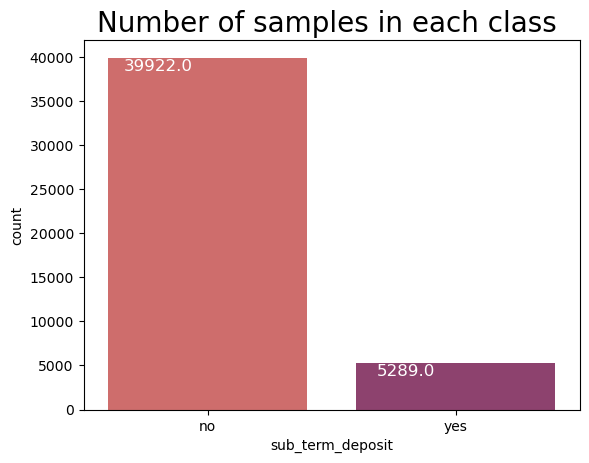

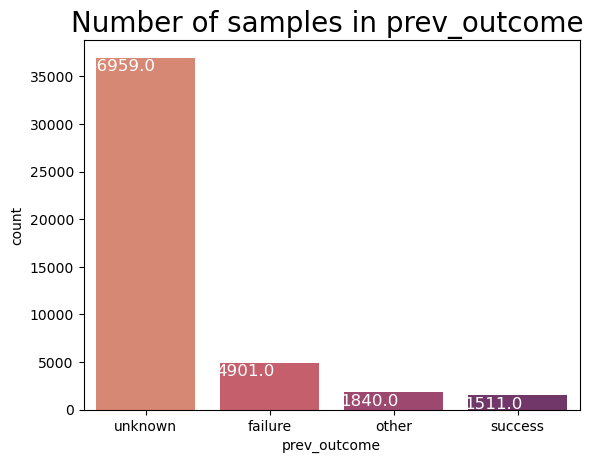

In [29]:
ax = sns.countplot(x="sub_term_deposit", data=df, palette="flare")
ax.set_title('Number of samples in each class ', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='white', size=12)
plt.show()

ax = sns.countplot(x="prev_outcome", data=df, palette="flare")
ax.set_title('Number of samples in prev_outcome ', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='white', size=12)
plt.show()

last_contact_month   apr   aug  dec   feb   jan   jul   jun  mar    may   nov  \
sub_term_deposit                                                                
no                  2355  5559  114  2208  1261  6268  4795  229  12841  3567   
yes                  577   688  100   441   142   627   546  248    925   403   

last_contact_month  oct  sep  
sub_term_deposit              
no                  415  310  
yes                 323  269  
job               admin.  blue-collar  entrepreneur  housemaid  management  \
sub_term_deposit                                                             
no                  4540         9024          1364       1131        8157   
yes                  631          708           123        109        1301   

job               retired  self-employed  services  student  technician  \
sub_term_deposit                                                          
no                   1748           1392      3785      669        6757   
yes          

(array([0, 1, 2, 3]),
 [Text(0, 0, 'unknown'),
  Text(1, 0, 'failure'),
  Text(2, 0, 'other'),
  Text(3, 0, 'success')])

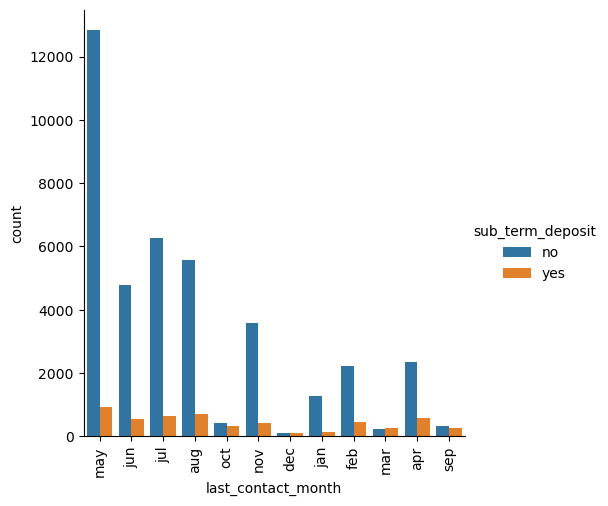

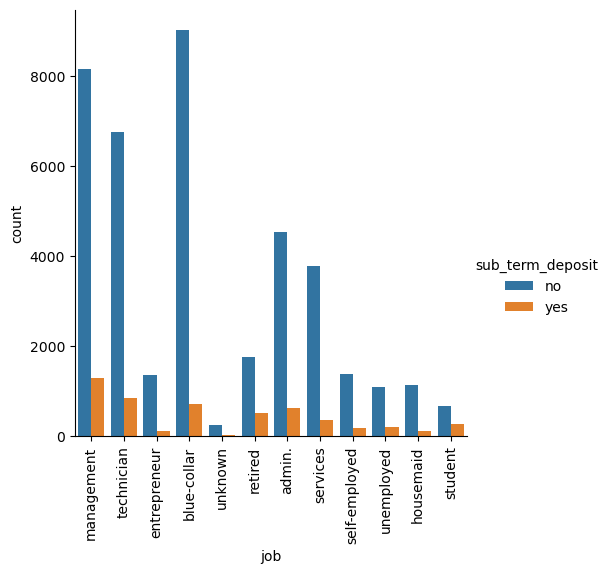

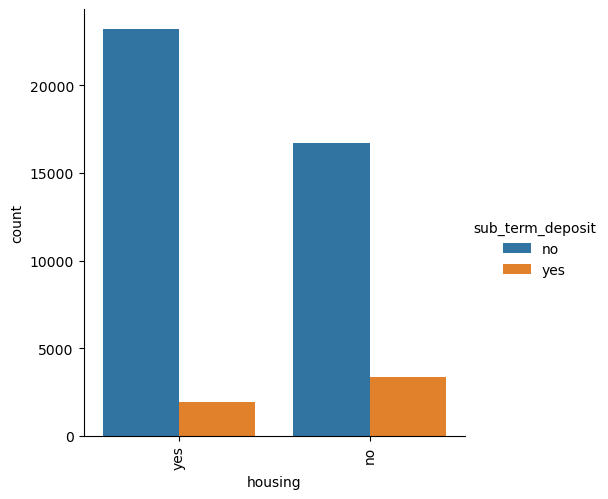

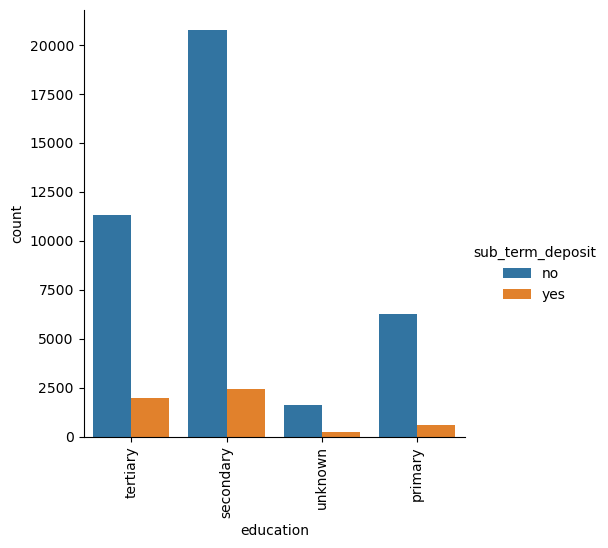

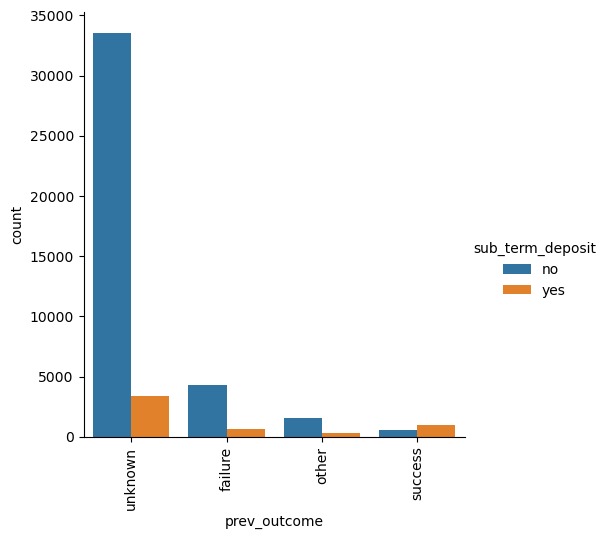

In [27]:
print(pd.crosstab(df['sub_term_deposit'], df.last_contact_month))
sns.catplot(data=df, x='last_contact_month', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)

print(pd.crosstab(df['sub_term_deposit'], df.job))
sns.catplot(data=df, x='job', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)

print(pd.crosstab(df['sub_term_deposit'], df.housing))
sns.catplot(data=df, x='housing', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)

print(pd.crosstab(df['sub_term_deposit'], df.education))
sns.catplot(data=df, x='education', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)

print(pd.crosstab(df['sub_term_deposit'], df.prev_outcome))
sns.catplot(data=df, x='prev_outcome', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)




In [32]:

X = df[['age', 
             'job', 
             'martial', 
             'education', 
             'cred_in_default', 
             'balance',
             'housing',
             'loan',
             'contact',
             'last_contact_day',
             'last_contact_month',
             'last_contact_dur',
             'num_of_contacts_during_campaign',
             'past_days',
             'prev_contacts',
             'prev_outcome']]
y = df[['sub_term_deposit']]
nrows, ncols = df.shape

encoder = ce.OrdinalEncoder(cols=['age', 
             'job', 
             'martial', 
             'education', 
             'cred_in_default', 
             'balance',
             'housing',
             'loan',
             'contact',
             'last_contact_day',
             'last_contact_month',
             'last_contact_dur',
             'num_of_contacts_during_campaign',
             'past_days',
             'prev_contacts',
             'prev_outcome'])
X_enc = encoder.fit_transform(X)

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.3, random_state=2)

Feature scores using Chi-square:  

Feature 0: 1675.368119
Feature 1: 31.042653
Feature 2: 18.089011
Feature 3: 45.672305
Feature 4: 0.355407
Feature 5: 635072.128186
Feature 6: 101.131160
Feature 7: 17.450297
Feature 8: 89.073276
Feature 9: 123.549178
Feature 10: 2239.719846
Feature 11: 531420.485249
Feature 12: 688.915734
Feature 13: 64859.818286
Feature 14: 1294.461411
Feature 15: 786.761341


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'job'),
  Text(2, 0, 'martial'),
  Text(3, 0, 'education'),
  Text(4, 0, 'cred_in_default'),
  Text(5, 0, 'balance'),
  Text(6, 0, 'housing'),
  Text(7, 0, 'loan'),
  Text(8, 0, 'contact'),
  Text(9, 0, 'last_contact_day'),
  Text(10, 0, 'last_contact_month'),
  Text(11, 0, 'last_contact_dur'),
  Text(12, 0, 'num_of_contacts_during_campaign'),
  Text(13, 0, 'past_days'),
  Text(14, 0, 'prev_contacts'),
  Text(15, 0, 'prev_outcome')])

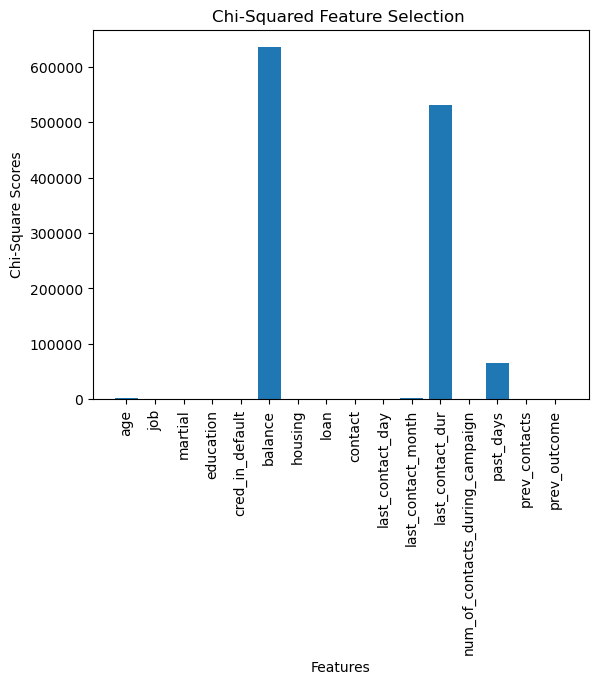

In [39]:
# Chi-squared feature selection
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# Scores for each feature
print('Feature scores using Chi-square: ','\n')
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# Plot scores
labels = ['age', 
             'job', 
             'martial', 
             'education', 
             'cred_in_default', 
             'balance',
             'housing',
             'loan',
             'contact',
             'last_contact_day',
             'last_contact_month',
             'last_contact_dur',
             'num_of_contacts_during_campaign',
             'past_days',
             'prev_contacts',
             'prev_outcome']
fig, ax = plt.subplots()
ax.set_xlabel("Features")
ax.set_ylabel("Chi-Square Scores")
ax.set_title("Chi-Squared Feature Selection ")
plt.bar([i for i in range(len(fs.scores_))], fs.scores_,tick_label=labels)
plt.xticks(rotation=90)

In [74]:
df_test = df.drop(['job','martial','education'], axis=1)

In [76]:
#Task 6 Data Prepration



# Set the input (X) and output/target (y) 
X = df_test.iloc[:, 1:13].values 
y = df_test.iloc[:, 13].values

#Encoding categorical data values
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [77]:
#Task 7 ANOVA FEATURE SELECTION
# Ranking of all features based on ANOVA F-scores

fs = SelectKBest(score_func=f_classif, k=30) 
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

scores = fs.scores_
feature_names = df.columns[1:16]  # Adjust the column slice according to your dataset
fs_score_df = pd.DataFrame({'Feature No': range(len(scores)), 'Score': scores, 'Feature Name': feature_names})

# sort the DataFrame by the Score in descending order
fs_score_df = fs_score_df.sort_values(by='Score', ascending=False)

# Plot the scores
plt.bar(feature_names, scores)
plt.xticks(rotation=90)  # Rotate the x labels to show them better
plt.show()

fs_score_df

ValueError: could not convert string to float: 'no'

age                                 int64
job                                object
martial                            object
education                          object
cred_in_default                    object
balance                             int64
housing                            object
loan                               object
contact                            object
last_contact_day                    int64
last_contact_month                 object
last_contact_dur                    int64
num_of_contacts_during_campaign     int64
past_days                           int64
prev_contacts                       int64
prev_outcome                       object
sub_term_deposit                   object
dtype: object


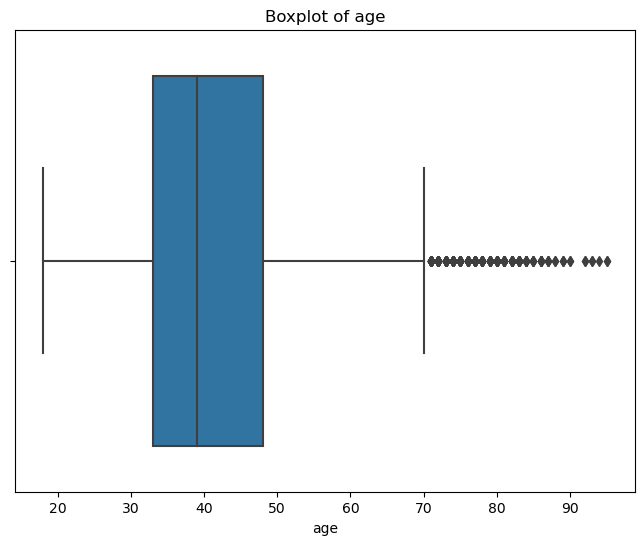

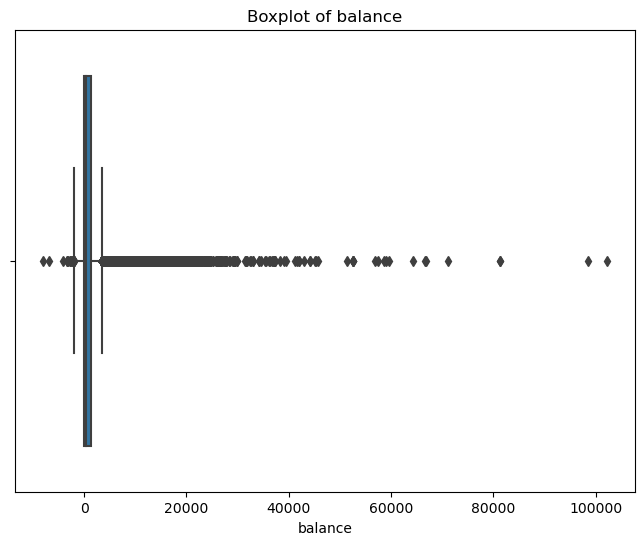

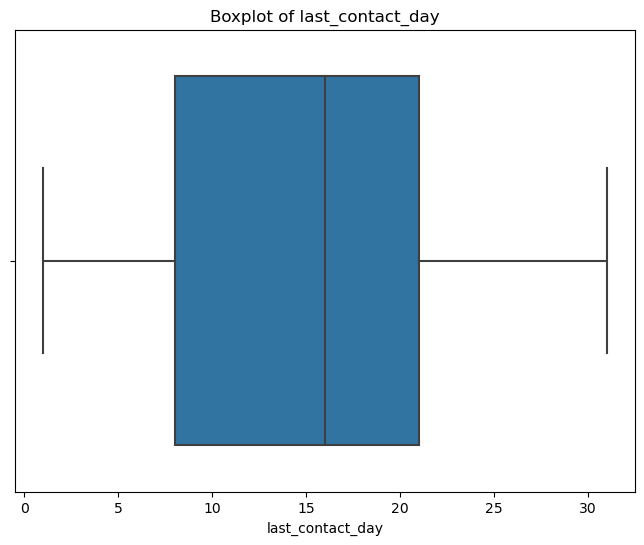

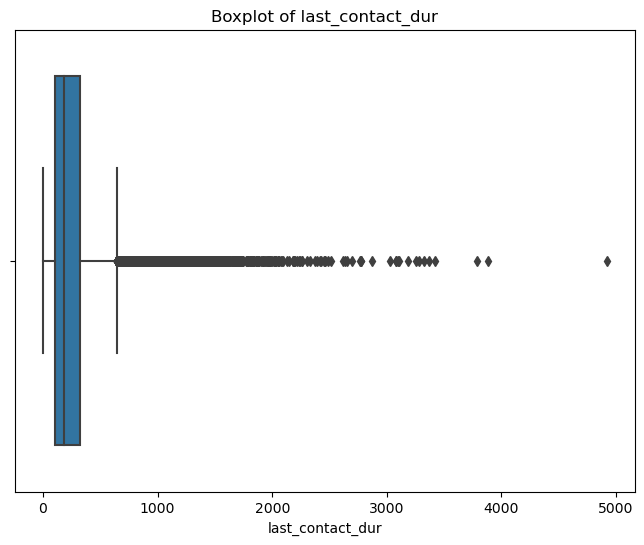

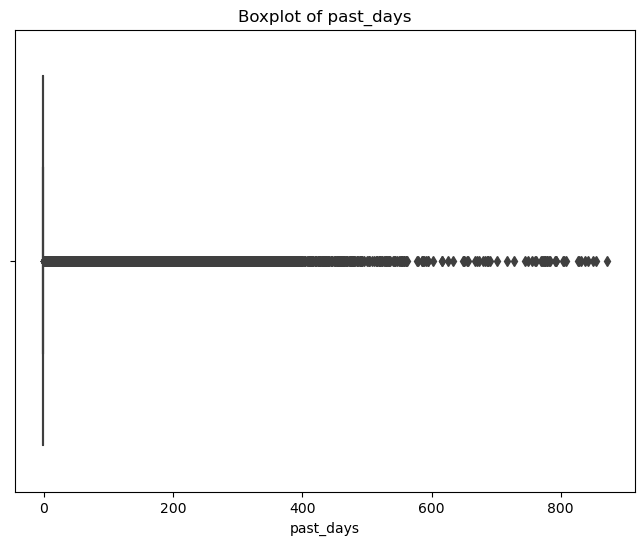

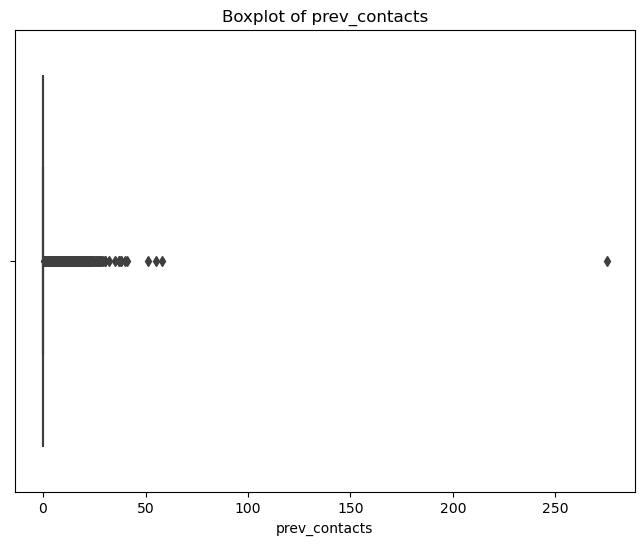

In [88]:
print(df.dtypes)

cont_features = ['age', 'balance', 'last_contact_day', 'last_contact_dur', 'past_days', 'prev_contacts']

for attribute in cont_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[attribute])
    plt.xlabel(attribute)
    plt.title(f'Boxplot of {attribute}')
    plt.show()
